<a href="https://colab.research.google.com/github/tribber93/MachineLearning/blob/main/K_Means_1_pertemuan_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Machine Learning/dataset/01_Dataset_KMeans.csv'
df = pd.read_csv(path)
df.head()

,No,Nama,MTK,FIS,KIM
0,1,Roy,89,90,75
1,2,Sintia,90,71,95
2,3,Iqbal,70,75,80
3,4,Dilan,45,65,59
4,5,Ratna,65,75,53


In [ ]:
x = df.iloc[:,[2,3,4]].values
x

array([[89, 90, 75],
       [90, 71, 95],
       [70, 75, 80],
       [45, 65, 59],
       [65, 75, 53],
       [80, 70, 75],
       [90, 85, 81],
       [70, 70, 73],
       [96, 93, 85],
       [60, 55, 48],
       [45, 60, 58],
       [60, 70, 72],
       [85, 90, 88],
       [52, 68, 55],
       [40, 60, 70]])

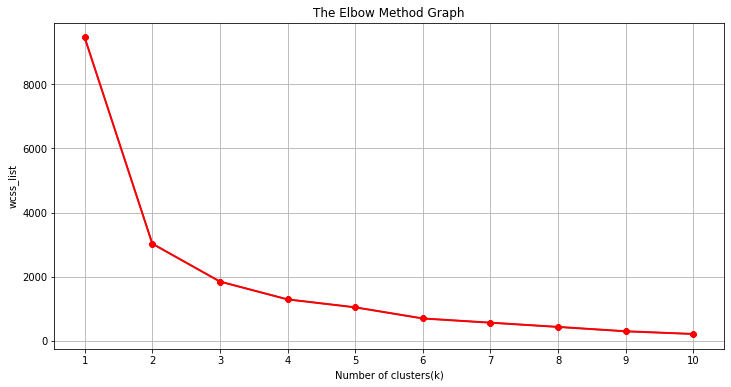

In [ ]:
wcss_list = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Method Graph')
plt.plot(range(1,11),wcss_list,linewidth=2,color="red",marker="8")
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.grid(b=True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1], dtype=int32)

In [ ]:
klas = []

for i in range(len(y_pred)):
  if(y_pred[i] == 0):
    # print("Kluster-1")
    klas.append("Kluster-1")
  elif(y_pred[i] == 1):
    # print("Kluster-2")
    klas.append("Kluster-3")
  else:
    # print("Kluster-3")
    klas.append("Kluster-2")

print(klas)

['Kluster-1', 'Kluster-1', 'Kluster-2', 'Kluster-3', 'Kluster-3', 'Kluster-2', 'Kluster-1', 'Kluster-2', 'Kluster-1', 'Kluster-3', 'Kluster-3', 'Kluster-2', 'Kluster-1', 'Kluster-3', 'Kluster-3']


In [ ]:
df["Kluster"] = klas
df

,No,Nama,MTK,FIS,KIM,Kluster
0,1,Roy,89,90,75,Kluster-1
1,2,Sintia,90,71,95,Kluster-1
2,3,Iqbal,70,75,80,Kluster-2
3,4,Dilan,45,65,59,Kluster-3
4,5,Ratna,65,75,53,Kluster-3
5,6,Merry,80,70,75,Kluster-2
6,7,Rudi,90,85,81,Kluster-1
7,8,Hafiz,70,70,73,Kluster-2
8,9,Gede,96,93,85,Kluster-1
9,10,Christian,60,55,48,Kluster-3


In [ ]:
#jumlah anggota setiap y_means hasil prediksi
unique, counts = np.unique(y_pred, return_counts=True)
pd.DataFrame(np.asarray((unique+1, counts)).T, columns=['cluster ke-', 'jumlah'])

,cluster ke-,jumlah
0,1,5
1,2,6
2,3,4


In [ ]:
#titik setiap pusat cluster (Centroid)
kmeans.cluster_centers_

array([[90.        , 85.8       , 84.8       ],
       [51.16666667, 63.83333333, 57.16666667],
       [70.        , 71.25      , 75.        ]])